In [1]:
import pandas as pd
import numpy as np

In [143]:
# Read the TSV file
df = pd.read_csv("train.tsv", sep='\t')


In [144]:
#data analysis

In [145]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [146]:
df.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [147]:
df.shape

(156060, 4)

In [165]:
df=df.iloc[:1000,:]

In [166]:
df.shape

(1000, 4)

In [167]:
data=df.drop(["PhraseId","SentenceId"],axis=1)

In [168]:
data.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [169]:
data['Sentiment'].value_counts()

Sentiment
2    670
1    139
3    139
4     37
0     15
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

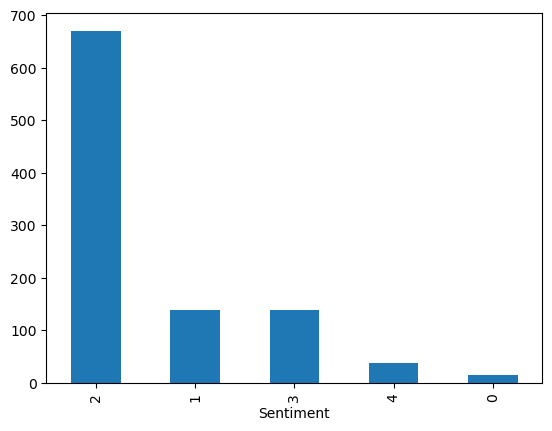

In [170]:
data['Sentiment'].value_counts().plot(kind='bar')

In [185]:
data['Phrase'][999]

'try avoid'

In [172]:
#### data cleaning steps:

"""

1. lower case
2. rmove htmp tag
3. remove url
4. remove emojies
5. remove special char
6. remove stop words
7. tokenization

"""

'\n\n1. lower case\n2. rmove htmp tag\n3. remove url\n4. remove emojies\n5. remove special char\n6. remove stop words\n7. tokenization\n\n'

In [173]:
import re
import string
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

def text_preprocessing(text):
    # 1. Convert to lower case
    text = text.lower()
    
    # 2. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # 3. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 4. Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # 5. Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # 6. Remove stop words
    stop_words = set(stopwords.words('english'))
    text_tokens = word_tokenize(text)
    text = ' '.join([word for word in text_tokens if word not in stop_words])
    
    # 7. Tokenization
    tokens = word_tokenize(text)
    
    return ' '.join(tokens)



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u911ea9076426f747fe4b87b316beb42/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/u911ea9076426f747fe4b87b316beb42/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [174]:
# Example usage
sample_text = "Hello World! This is a sample text with a URL: https://example.com and some emojis 😊🚀."
cleaned_text = text_preprocessing(sample_text)
print(cleaned_text)

hello world sample text url emojis


/tmp/ipykernel_3374751/1860182652.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [175]:
data['Phrase']=data['Phrase'].apply(lambda x:text_preprocessing(x))

In [176]:
data['Phrase'][100]

'would hard time sitting one'

In [177]:
### vectorization methods

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.Sentiment.values
X=tfidf.fit_transform(data.Phrase)

X_dense = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out()) 
X_dense['PhraseId'] = df['PhraseId'].values 
X_dense['SentenceId'] = df['SentenceId'].values

In [178]:
### now data spliting


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [179]:
### now data is ready for ML algorithm lets build the  model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.655

In [180]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.665


In [181]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.695


In [182]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))


SVM Accuracy: 0.675


In [183]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))


KNN Accuracy: 0.665


In [184]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))


Gradient Boosting Accuracy: 0.69
